In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow import keras
import os

In [2]:
path = '/content/drive/MyDrive/projects/Garbage_scanning/5class_gaarbage_classifier/mobilenet/data/Garbage classification/Garbage classification'

In [3]:
os.listdir(path)

['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']

In [4]:
import os
import shutil
from sklearn.model_selection import train_test_split

# Define the path to your dataset
data_dir = "/content/drive/MyDrive/projects/Garbage_scanning/5class_gaarbage_classifier/mobilenet/data/Garbage classification"

# Define the classes
classes = ['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']

# Define the ratio for splitting the dataset
test_size = 0.2  # 20% for testing, adjust as needed

# Create directories for train and test data
train_dir = "/content/drive/MyDrive/projects/Garbage_scanning/5class_gaarbage_classifier/mobilenet/data/Garbage classification/train"
test_dir = "/content/drive/MyDrive/projects/Garbage_scanning/5class_gaarbage_classifier/mobilenet/data/Garbage classification/test"
os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# Splitting the dataset and moving files
for cls in classes:
    cls_dir = os.path.join(path, cls)
    train_cls_dir = os.path.join(train_dir, cls)
    test_cls_dir = os.path.join(test_dir, cls)
    os.makedirs(train_cls_dir, exist_ok=True)
    os.makedirs(test_cls_dir, exist_ok=True)

    # Get list of images in class directory
    images = os.listdir(cls_dir)
    train_images, test_images = train_test_split(images, test_size=test_size, random_state=42)

    # Move images to train directory
    for image in train_images:
        src = os.path.join(cls_dir, image)
        dst = os.path.join(train_cls_dir, image)
        shutil.copy(src, dst)

    # Move images to test directory
    for image in test_images:
        src = os.path.join(cls_dir, image)
        dst = os.path.join(test_cls_dir, image)
        shutil.copy(src, dst)

print("Dataset split into train and test sets successfully.")


Dataset split into train and test sets successfully.


In [5]:
import os
import shutil
from sklearn.model_selection import train_test_split
path2='/content/drive/MyDrive/projects/Garbage_scanning/5class_gaarbage_classifier/mobilenet/data/Garbage classification/test'
# Define the path to your dataset
data_dir = "/content/drive/MyDrive/projects/Garbage_scanning/5class_gaarbage_classifier/mobilenet/data/Garbage classification"

# Define the classes
classes = ['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']

# Define the ratio for splitting the dataset
test_size = 0.25  # 20% for testing, adjust as needed

# Create directories for valid and test data
valid_dir = "/content/drive/MyDrive/projects/Garbage_scanning/5class_gaarbage_classifier/mobilenet/data/Garbage classification/validation"
test_dir2 = "/content/drive/MyDrive/projects/Garbage_scanning/5class_gaarbage_classifier/mobilenet/data/Garbage classification/test2"
os.makedirs(valid_dir, exist_ok=True)
os.makedirs(test_dir2, exist_ok=True)

# Splitting the dataset and moving files
for cls in classes:
    cls_dir = os.path.join(path2, cls)
    valid_cls_dir = os.path.join(valid_dir, cls)
    test_cls_dir2 = os.path.join(test_dir2, cls)
    os.makedirs(valid_cls_dir, exist_ok=True)
    os.makedirs(test_cls_dir2, exist_ok=True)

    # Get list of images in class directory
    images = os.listdir(cls_dir)
    valid_images, test_images2 = train_test_split(images, test_size=test_size, random_state=42)

    # Move images to train directory
    for image in valid_images:
        src = os.path.join(cls_dir, image)
        dst = os.path.join(valid_cls_dir, image)
        shutil.copy(src, dst)

    # Move images to test directory
    for image in test_images2:
        src = os.path.join(cls_dir, image)
        dst = os.path.join(test_cls_dir2, image)
        shutil.copy(src, dst)

print("Dataset split into train and test sets successfully.")

Dataset split into train and test sets successfully.


In [6]:
IMAGE_SHAPE=(224,224)

In [7]:
image_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255)
training_image_data  = image_generator.flow_from_directory(train_dir,target_size=IMAGE_SHAPE)

Found 2019 images belonging to 6 classes.


In [8]:
training_image_data[1][1].shape

(32, 6)

In [9]:
validation_image_data  = image_generator.flow_from_directory(valid_dir,target_size=IMAGE_SHAPE)

Found 378 images belonging to 6 classes.


In [10]:
class_names = sorted(training_image_data.class_indices.items(), key=lambda pair:pair[1])
class_names = np.array([key.title() for key, value in class_names])
class_names

array(['Cardboard', 'Glass', 'Metal', 'Paper', 'Plastic', 'Trash'],
      dtype='<U9')

In [11]:
MobileNetV2=tf.keras.applications.mobilenet_v2.MobileNetV2
model_arch=MobileNetV2()
model_arch.summary()

14536120/14536120 [==============================] - 0s 0us/step
Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 112, 112, 32)         864       ['input_1[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 112, 112, 32)         128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (R

In [12]:
feature_extractor_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4"

In [13]:
feature_extractor = hub.KerasLayer(feature_extractor_model, input_shape=(224, 224, 3), trainable=False)

In [14]:
model = tf.keras.Sequential([feature_extractor])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1001)              3540265   
                                                                 
Total params: 3540265 (13.51 MB)
Trainable params: 0 (0.00 Byte)
Non-trainable params: 3540265 (13.51 MB)
_________________________________________________________________


In [15]:
for image_batch, label_batch in training_image_data:
  print("Image batch shape: ", image_batch.shape)
  print("Label batch shape: ", label_batch.shape)
  break

Image batch shape:  (32, 224, 224, 3)
Label batch shape:  (32, 6)


In [16]:
model1 = tf.keras.Sequential([feature_extractor ])
model1.add(tf.keras.layers.Dense(6))
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1001)              3540265   
                                                                 
 dense (Dense)               (None, 6)                 6012      
                                                                 
Total params: 3546277 (13.53 MB)
Trainable params: 6012 (23.48 KB)
Non-trainable params: 3540265 (13.51 MB)
_________________________________________________________________


In [17]:
model1.compile(optimizer='Adam', loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True), metrics=['acc'])

In [18]:
class CollectBatchStats(tf.keras.callbacks.Callback):
  def __init__(self):
    self.batch_losses = []
    self.batch_acc = []

  def on_train_batch_end(self, batch, logs=None):
    self.batch_losses.append(logs['loss'])
    self.batch_acc.append(logs['acc'])
    self.model.reset_metrics()

batch_stats_callback = CollectBatchStats()

In [19]:
history = model1.fit(training_image_data, epochs = 8,
                          validation_data=validation_image_data, callbacks=[batch_stats_callback])

Epoch 1/8
64/64 [==============================] - 25s 277ms/step - loss: 0.0000e+00 - acc: 0.0000e+00 - val_loss: 0.6988 - val_acc: 0.7487
Epoch 2/8
64/64 [==============================] - 13s 205ms/step - loss: 0.0000e+00 - acc: 0.0000e+00 - val_loss: 0.5778 - val_acc: 0.8095
Epoch 3/8
64/64 [==============================] - 20s 308ms/step - loss: 0.0000e+00 - acc: 0.0000e+00 - val_loss: 0.5616 - val_acc: 0.8175
Epoch 4/8
64/64 [==============================] - 27s 417ms/step - loss: 0.0000e+00 - acc: 0.0000e+00 - val_loss: 0.5681 - val_acc: 0.8122
Epoch 5/8
64/64 [==============================] - 13s 209ms/step - loss: 0.0000e+00 - acc: 0.0000e+00 - val_loss: 0.5216 - val_acc: 0.8122
Epoch 6/8
64/64 [==============================] - 13s 202ms/step - loss: 0.0000e+00 - acc: 0.0000e+00 - val_loss: 0.5199 - val_acc: 0.8228
Epoch 7/8
64/64 [==============================] - 13s 203ms/step - loss: 0.0000e+00 - acc: 0.0000e+00 - val_loss: 0.5162 - val_acc: 0.8228
Epoch 8/8
64/64 [===

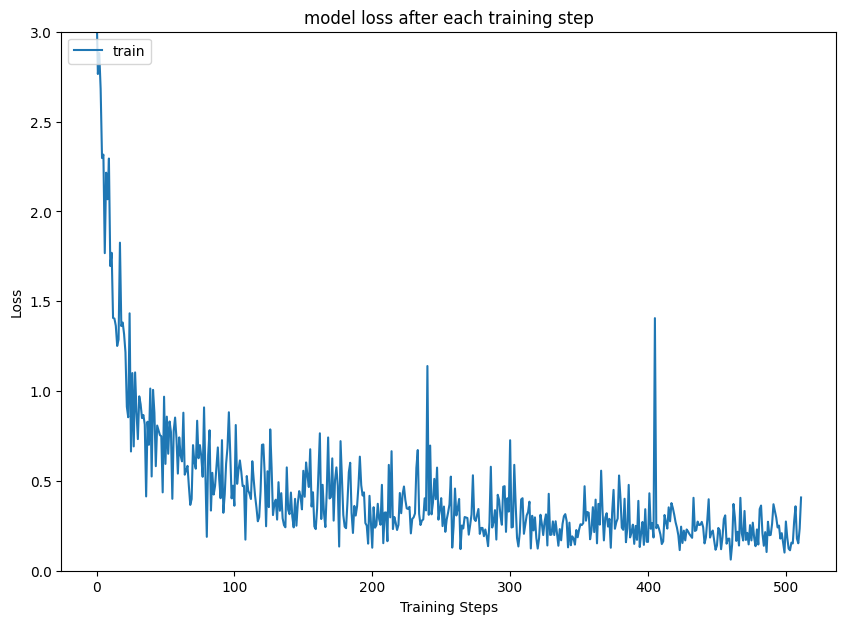

In [20]:
plt.figure(figsize=(10,7))
plt.ylabel("Loss")
plt.xlabel("Training Steps")
plt.ylim([0,3])
plt.plot(batch_stats_callback.batch_losses)
plt.title('model loss after each training step')
plt.legend(['train'], loc='upper left')

In [21]:
arr = model1.predict(image_batch)
predicted_id = np.argmax(arr, axis=-1)
predicted_label_batch = class_names[predicted_id]
label_id = np.argmax(label_batch, axis=-1)
true_label_batch = class_names[label_id]

1/1 [==============================] - 1s 792ms/step


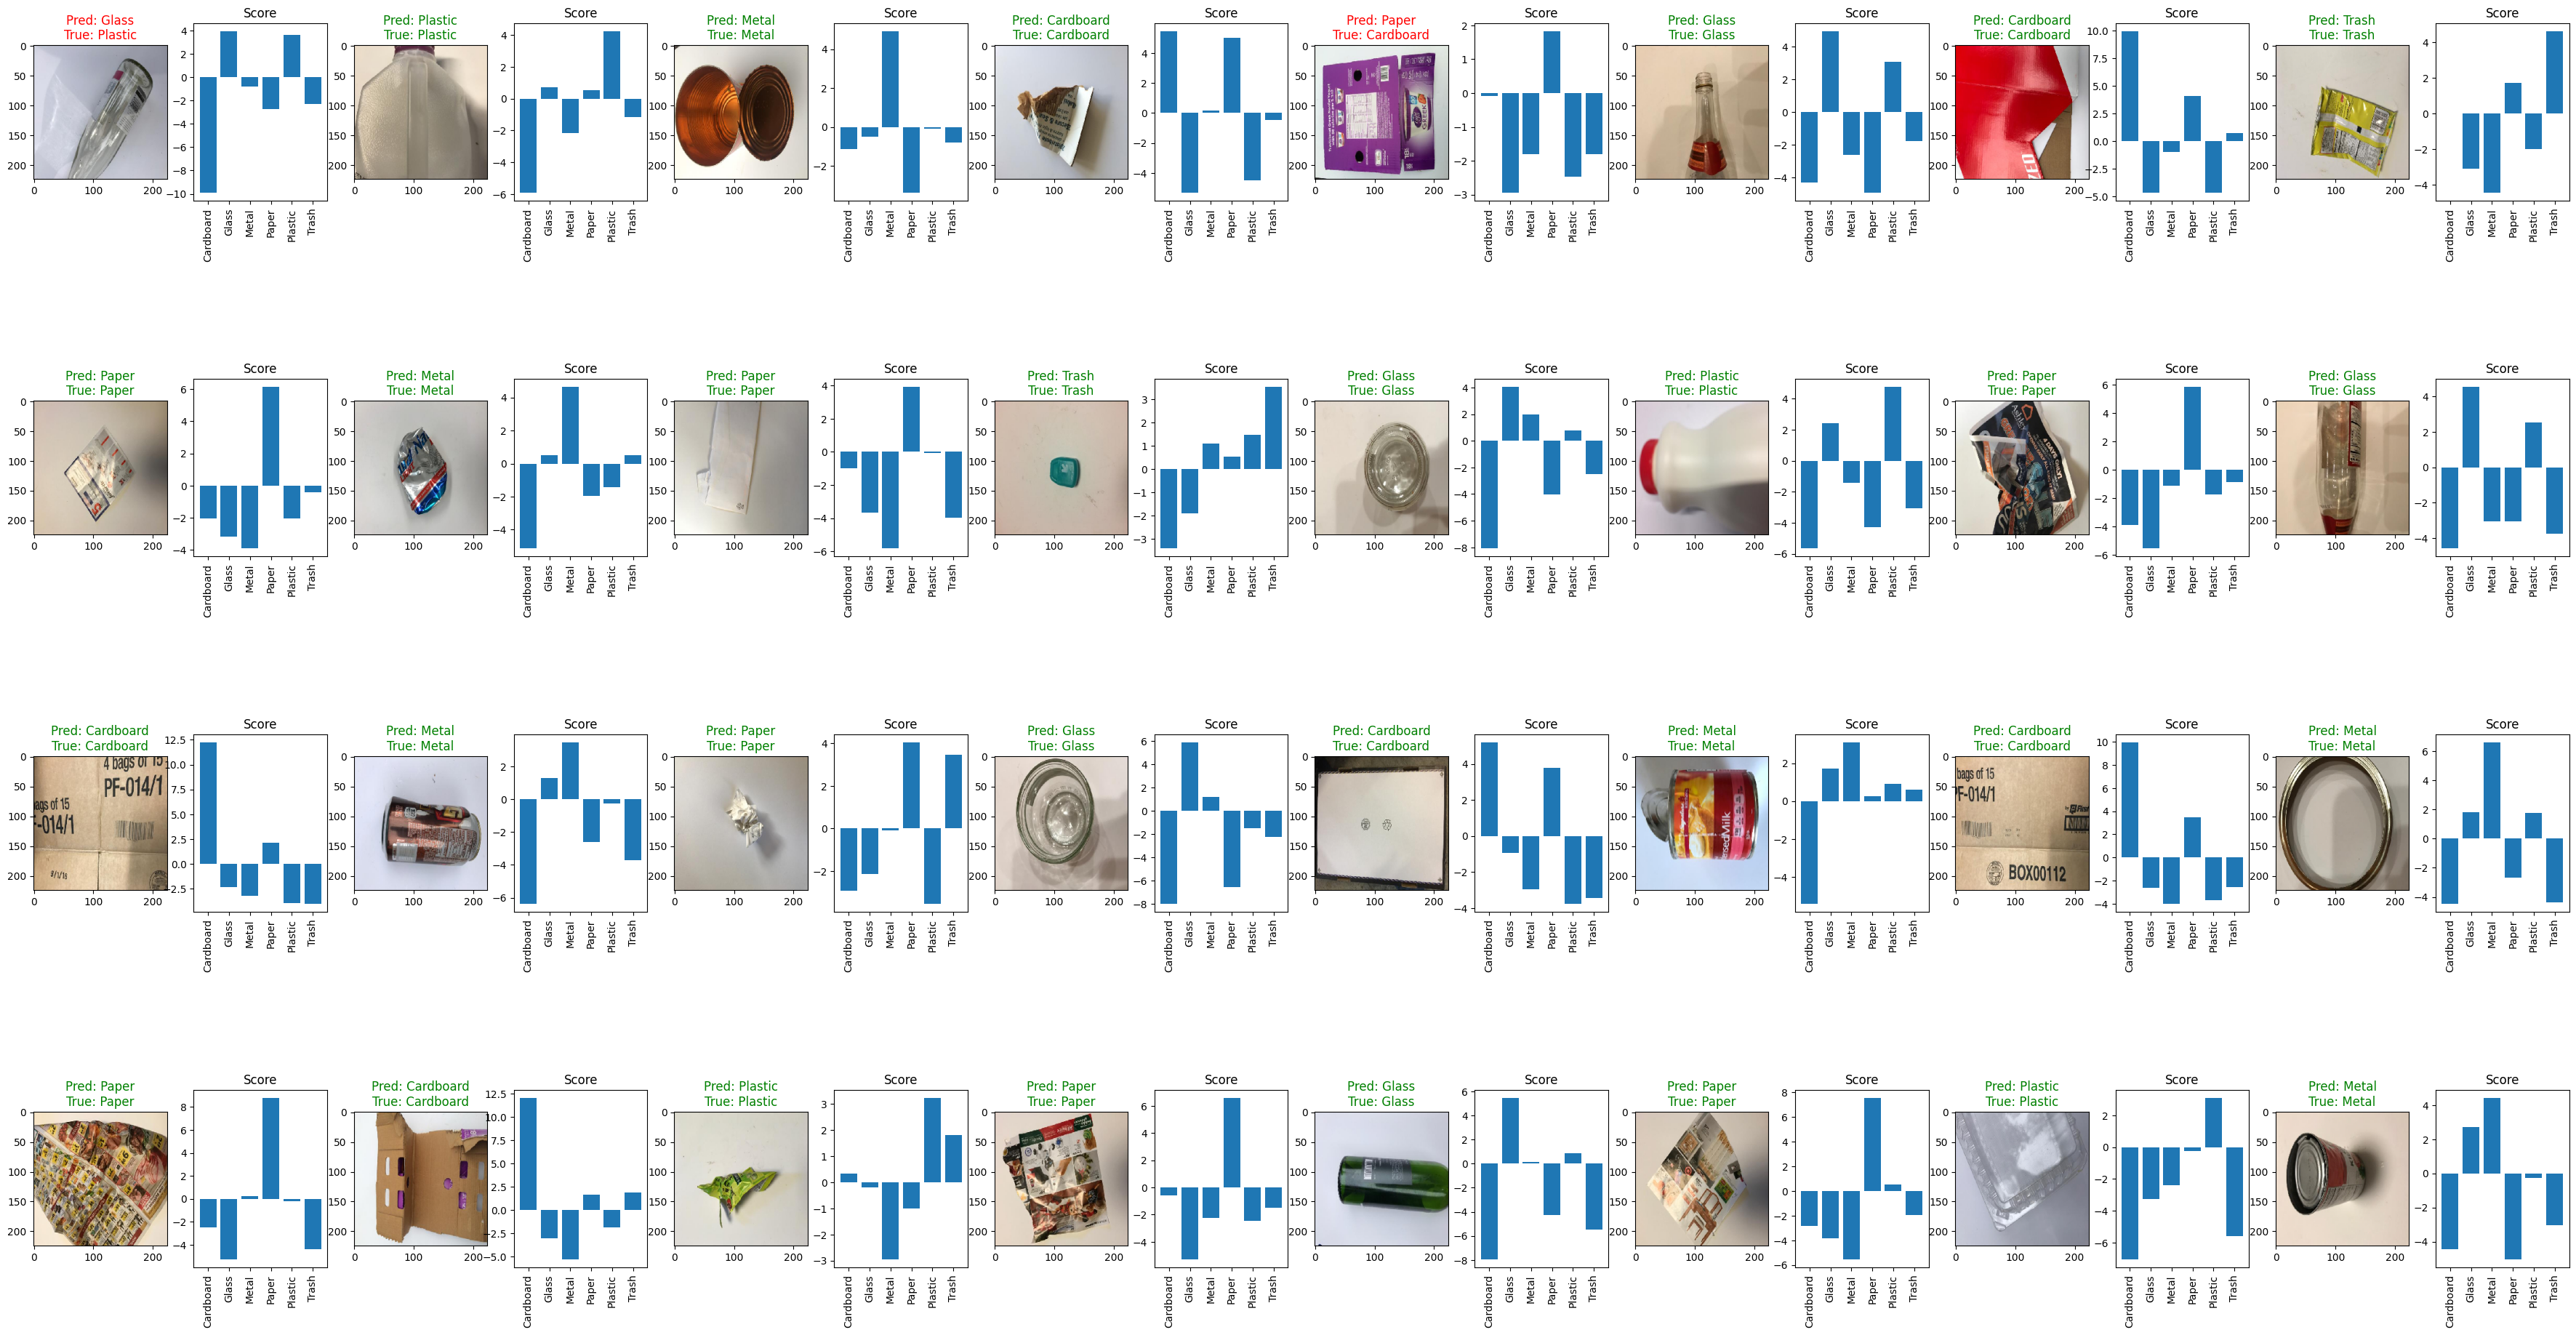

In [22]:
img_counter=0
prob_counter=0

plt.figure(figsize=(45,200))
plt.subplots_adjust(hspace=1)
for n in range(64):

  plt.subplot(32,16,n+1)
  if(n%2==0):
      plt.imshow(image_batch[img_counter])
      color = "green" if predicted_id[img_counter] == label_id[img_counter] else "red"
      plt.title("Pred: "+predicted_label_batch[img_counter].title()+"\nTrue: "+true_label_batch[img_counter], color=color)
      img_counter=img_counter+1

  if(n%2==1):
      plt.title("Score", color="Black")

      data=[arr[prob_counter][0],arr[prob_counter][1],arr[prob_counter][2],
            arr[prob_counter][3], arr[prob_counter][4], arr[prob_counter][5]
            ]

      plt.bar(class_names,data)
      plt.xticks(rotation='vertical')

      prob_counter=prob_counter+1

In [23]:
test_image_data  = image_generator.flow_from_directory(test_dir2,target_size=IMAGE_SHAPE, batch_size=150)

Found 130 images belonging to 6 classes.


In [24]:
for image_batch, label_batch in test_image_data:
  print("Image batch shape: ", image_batch.shape)
  print("Label batch shape: ", label_batch.shape)
  break

Image batch shape:  (130, 224, 224, 3)
Label batch shape:  (130, 6)


In [25]:
predicted_batch = model1.predict(image_batch)
predicted_id = np.argmax(predicted_batch, axis=-1)
label_id = np.argmax(label_batch, axis=-1)

5/5 [==============================] - 2s 224ms/step


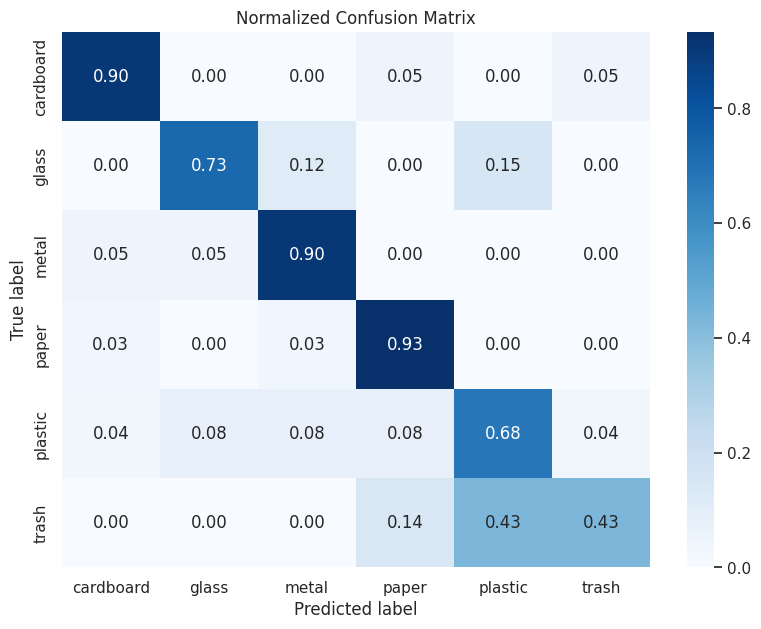

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

# Assuming label_id and predicted_id are your true and predicted labels
conf_matrix = tf.math.confusion_matrix(labels=label_id, predictions=predicted_id)

# Normalize the confusion matrix
conf_matrix_sum = tf.reduce_sum(conf_matrix, axis=1)
conf_matrix_norm = conf_matrix / tf.reshape(conf_matrix_sum, (-1, 1))

# Convert the normalized confusion matrix to a NumPy array for plotting
con_mat_norm = conf_matrix_norm.numpy()

# Define class labels
class_labels = ['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']

# Convert the normalized confusion matrix to a DataFrame
con_mat_df = pd.DataFrame(con_mat_norm, index=class_labels, columns=class_labels)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(con_mat_df, annot=True, fmt='.2f', cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Normalized Confusion Matrix')
plt.show()


In [34]:
# 'cardboard'-0, 'glass'-1, 'metal'-2, 'paper'-3, 'plastic'-4, 'trash'-5

In [35]:
from sklearn.metrics import classification_report
print(classification_report(label_id, predicted_id, zero_division=0))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88        21
           1       0.86      0.73      0.79        26
           2       0.76      0.90      0.83        21
           3       0.88      0.93      0.90        30
           4       0.71      0.68      0.69        25
           5       0.60      0.43      0.50         7

    accuracy                           0.81       130
   macro avg       0.78      0.76      0.77       130
weighted avg       0.81      0.81      0.80       130

